<a href="https://colab.research.google.com/github/Manvi1203/PV-Power-Forecasting/blob/main/ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_dataset.csv to merged_dataset.csv


In [2]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
generation_data = pd.read_csv('/content/merged_dataset.csv')


In [5]:
print(generation_data.columns)
# Interpolate null values in 'temperature_2m (°C)'
generation_data['temperature_2m (°C)'] = generation_data['temperature_2m (°C)'].interpolate()

# Drop specified columns
columns_to_drop = ['rain (mm)', 'cloud_cover (%)', 'cloud_cover_low (%)',
                   'cloud_cover_mid (%)', 'cloud_cover_high (%)',
                   'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
                   'Unnamed: 12', 'Unnamed: 13']

generation_data = generation_data.drop(columns=columns_to_drop, axis=1)

# Print or use the modified DataFrame 'df'
print(generation_data)

# columns_to_check = ['DATE_TIME\t', 'DC_POWER\t', 'AC_POWER\t', 'time',
#        'temperature_2m (°C)', 'rain (mm)', 'cloud_cover (%)',
#        'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
#        'wind_speed_100m (km/h)', 'wind_direction_10m (°)']

# generation_data= generation_data.dropna(subset=columns_to_check)
# generation_data = generation_data[(generation_data[columns_to_check] != 0).all(axis=1)]


# Drop the "Unnamed: 12" and "Unnamed: 13" columns
# generation_data = generation_data.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1)

Index(['DATE_TIME\t', 'DC_POWER\t', 'AC_POWER\t', 'time',
       'temperature_2m (°C)', 'rain (mm)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')
               DATE_TIME\t  DC_POWER\t  AC_POWER\t                 time  \
0      2021-01-21 05:30:00      1319.0      1472.0  2021-01-21 08:00:00   
1      2021-01-21 05:45:00      2182.0      2304.0                  NaN   
2      2021-01-21 06:00:00      3182.0      3304.0                  NaN   
3      2021-01-21 06:15:00      4098.0      4219.0                  NaN   
4      2021-01-21 06:30:00      5229.0      5362.0  2021-01-21 09:00:00   
...                    ...         ...         ...                  ...   
34950  2022-05-22 07:45:06         NaN         NaN                  NaN   
34951  2022-05-22 08:00:06         NaN         NaN                  NaN   
34952  20

In [6]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })



,DATE_TIME,DC_POWER,AC_POWER,time,temperature_2m (°C)
17384,2021-11-17 20:30:06,0.000000,0.000000,nan,23.261538
15178,2021-10-25 21:30:03,0.000000,0.000000,nan,19.658929
24648,2022-02-02 03:15:04,0.000000,0.000000,nan,8.675000
17471,2021-11-18 18:15:00,0.000000,0.000000,nan,18.481250
31961,2022-04-21 05:45:05,2543.000000,2703.000000,nan,28.900000


In [7]:
generation_data.columns
generation_data.columns = generation_data.columns.str.strip()
generation_data.columns

Index(['DATE_TIME', 'DC_POWER', 'AC_POWER', 'time', 'temperature_2m (°C)'], dtype='object')

In [8]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df_solar = generation_data


In [10]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models`
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,DC_POWER,AC_POWER,time,temperature_2m (°C),DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2021-01-21 05:30:00,1319.0,1472.0,2021-01-21 08:00:00,10.50,2021-01-21,05:30:00,21,1,3,5,30,330,2021-01-21
1,2021-01-21 05:45:00,2182.0,2304.0,NaN,11.25,2021-01-21,05:45:00,21,1,3,5,45,345,2021-01-21


In [11]:
df_solar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34955 entries, 0 to 34954
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            34955 non-null  datetime64[ns]
 1   DC_POWER             32873 non-null  float64       
 2   AC_POWER             28823 non-null  float64       
 3   time                 2099 non-null   object        
 4   temperature_2m (°C)  34955 non-null  float64       
 5   DATE                 34955 non-null  object        
 6   TIME                 34955 non-null  object        
 7   DAY                  34955 non-null  int64         
 8   MONTH                34955 non-null  int64         
 9   WEEK                 34955 non-null  int64         
 10  HOURS                34955 non-null  object        
 11  MINUTES              34955 non-null  int64         
 12  TOTAL MINUTES PASS   34955 non-null  int64         
 13  DATE_STRING          34955 non-

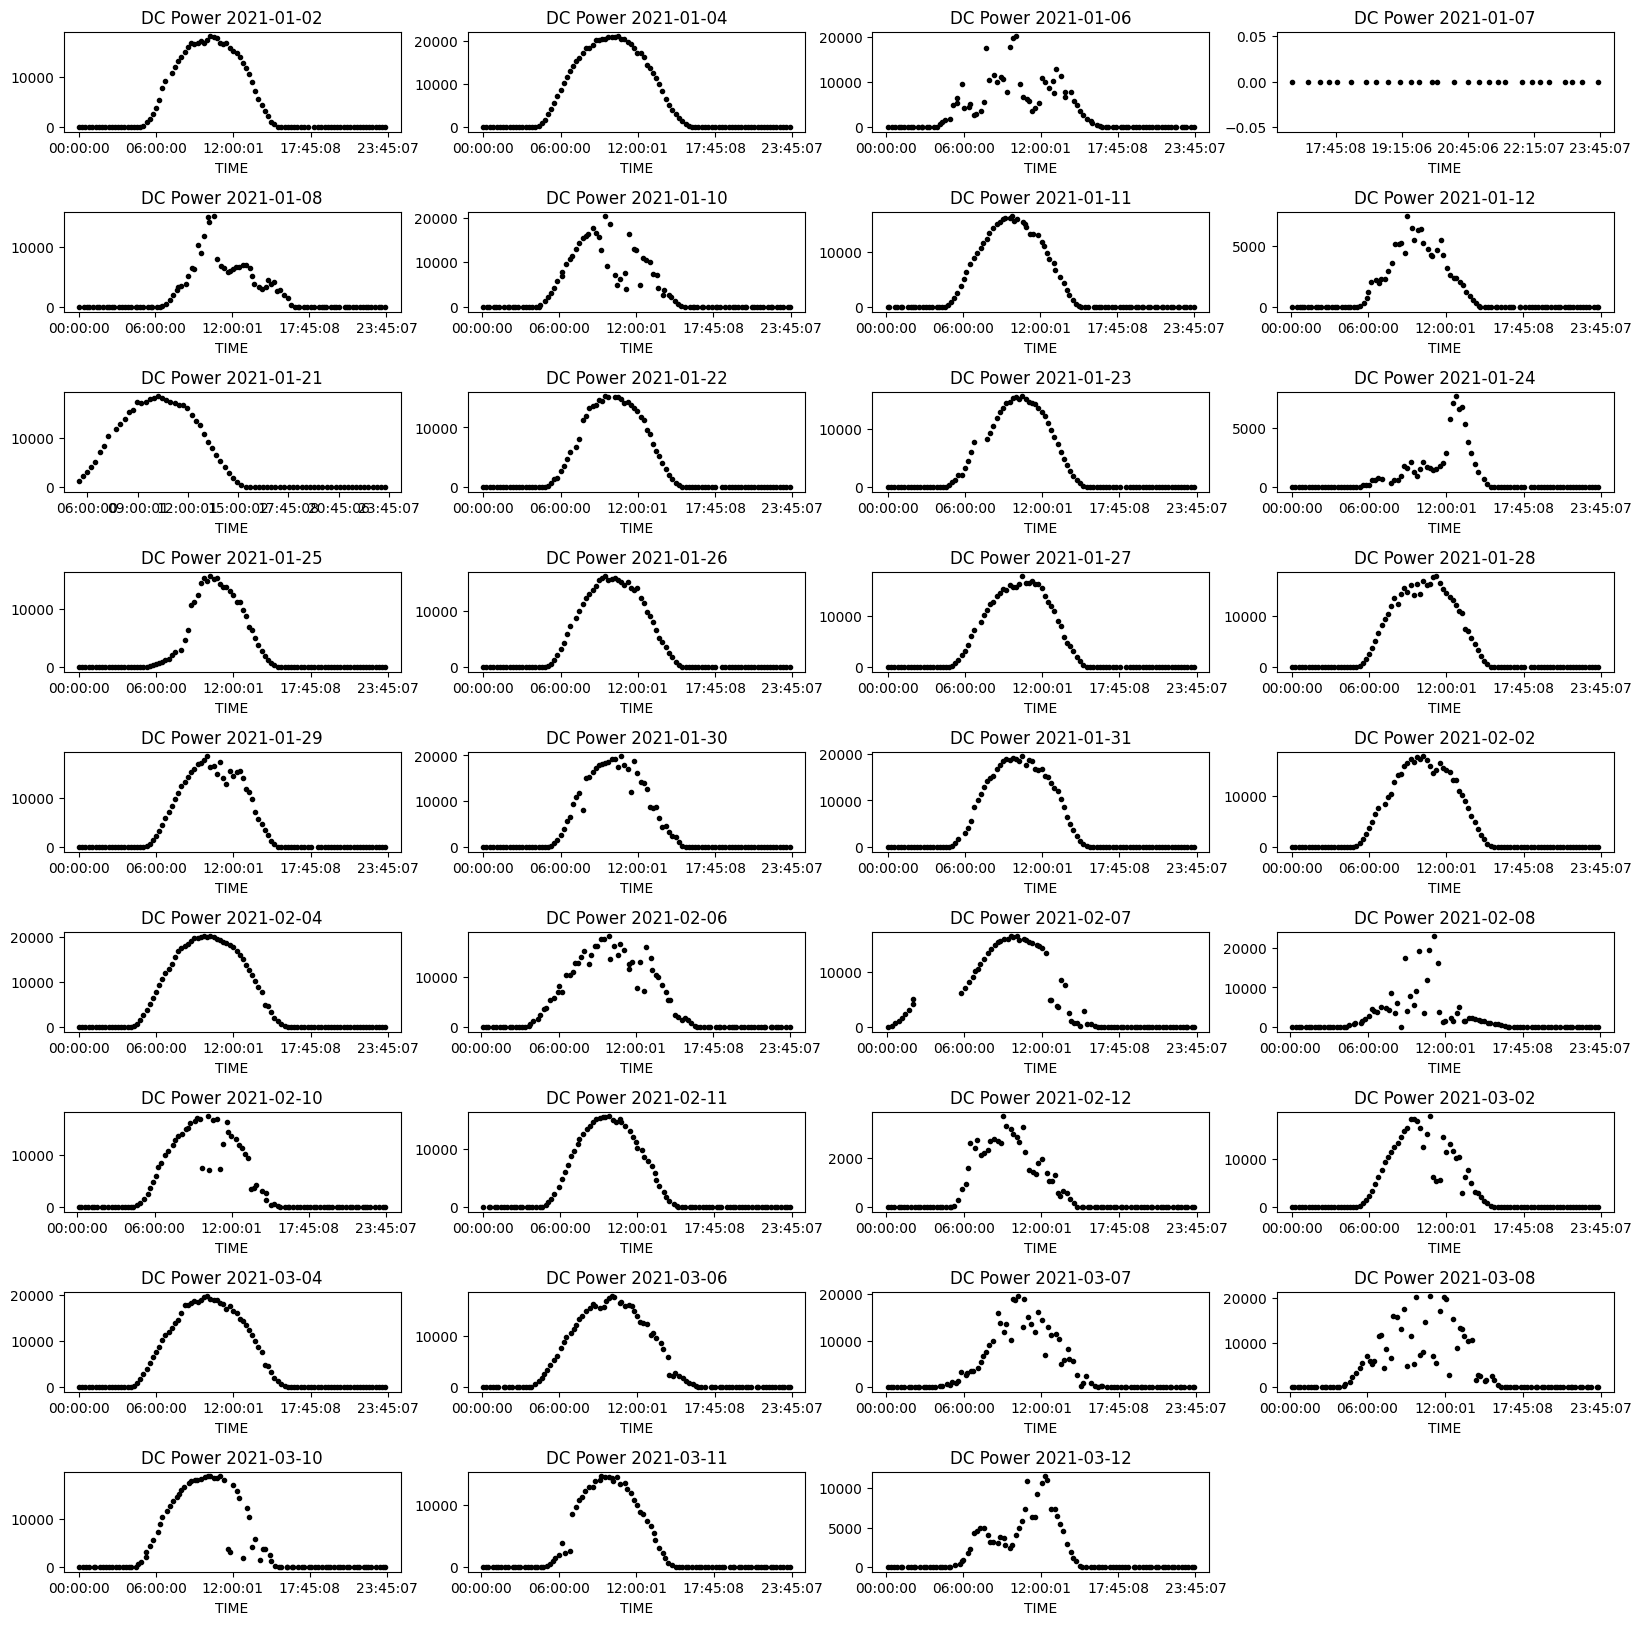

In [12]:
calendar_dc = generation_data.pivot_table(values='DC_POWER', index='TIME', columns='DATE')
def multi_plot(data=None, row=None, col=None, title='DC Power', max_plots=35):
    cols = data.columns  # Take all columns
    num_subplots = min(max_plots, len(cols))

    gp = plt.figure(figsize=(20, 20))
    gp.subplots_adjust(wspace=0.2, hspace=0.8)

    for i in range(1, num_subplots + 1):
        ax = gp.add_subplot(row, col, i)
        data[cols[i - 1]].plot(ax=ax, style='k.')
        ax.set_title('{} {}'.format(title, cols[i - 1]))

multi_plot(data=calendar_dc, row=9, col=4)


In [13]:
df_solar.isnull().sum()


DATE_TIME                  0
DC_POWER                2082
AC_POWER                6132
time                   32856
temperature_2m (°C)        0
DATE                       0
TIME                       0
DAY                        0
MONTH                      0
WEEK                       0
HOURS                      0
MINUTES                    0
TOTAL MINUTES PASS         0
DATE_STRING                0
dtype: int64

In [14]:
# df_solar = df_solar.sort_values(by='DATE_TIME')


In [15]:
df_solar = df_solar.dropna()

# df_solar['DC_POWER'].interpolate(method='polynomial', order=1, inplace=True)
# df_solar['AC_POWER'].interpolate(method='polynomial', order=1, inplace=True)

# # Set negative values to 0
# df_solar['DC_POWER'] = df_solar['DC_POWER'].clip(lower=0)
# df_solar['AC_POWER'] = df_solar['AC_POWER'].clip(lower=0)


In [16]:
df_solar.isnull().sum()


DATE_TIME              0
DC_POWER               0
AC_POWER               0
time                   0
temperature_2m (°C)    0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [17]:
df_solar.describe().style.background_gradient(cmap='Pastel2')


,DC_POWER,AC_POWER,temperature_2m (°C),DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000
mean,3926.629816,4028.954216,23.237130,14.778336,4.891122,19.251256,39.932998,726.633166
std,6216.206241,6350.275226,8.852849,10.394267,3.417485,14.527126,13.540586,435.738504
min,0.000000,0.000000,4.400000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,16.100000,4.000000,2.000000,7.500000,45.000000,345.000000
50%,0.000000,0.000000,24.100000,14.000000,4.000000,15.000000,45.000000,765.000000
75%,6703.500000,6893.000000,30.200000,25.000000,7.000000,29.000000,45.000000,1125.000000
max,24285.000000,24868.000000,43.300000,31.000000,12.000000,53.000000,45.000000,1425.000000


In [18]:
df_solar['DATE'].nunique()


299

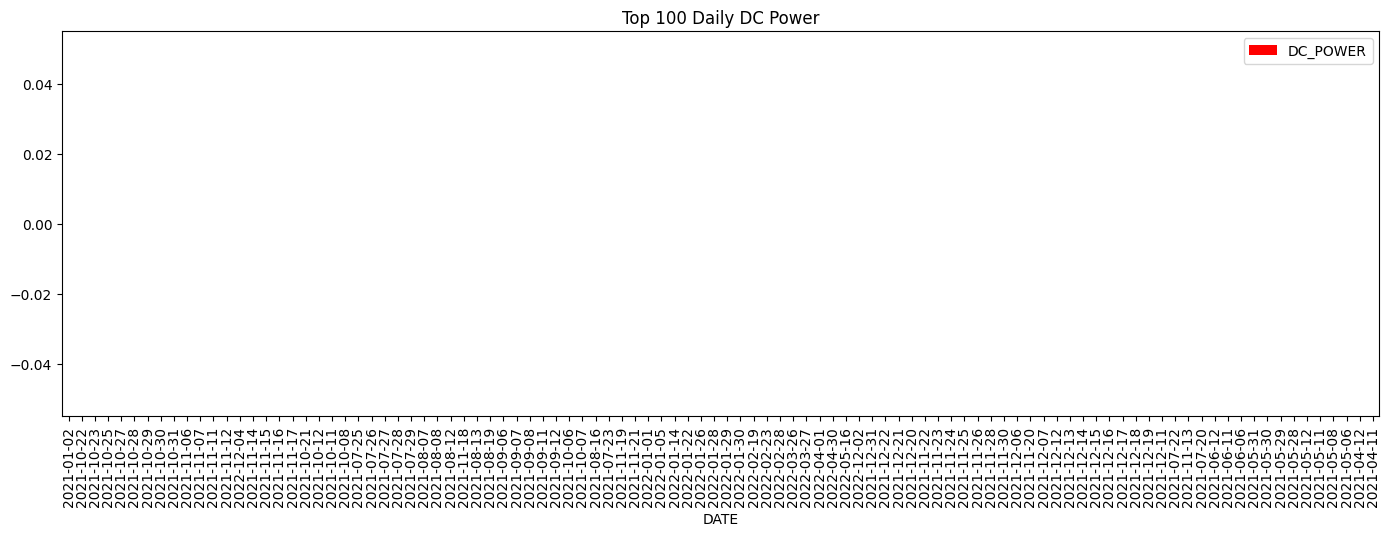

In [19]:
N = 100

daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

top_dates = daily_dc.sort_values(ascending=True).head(N)

ax = top_dates.plot.bar(figsize=(17, 5), legend=True, color='red')
plt.title(f'Top {N} Daily DC Power')
plt.show()


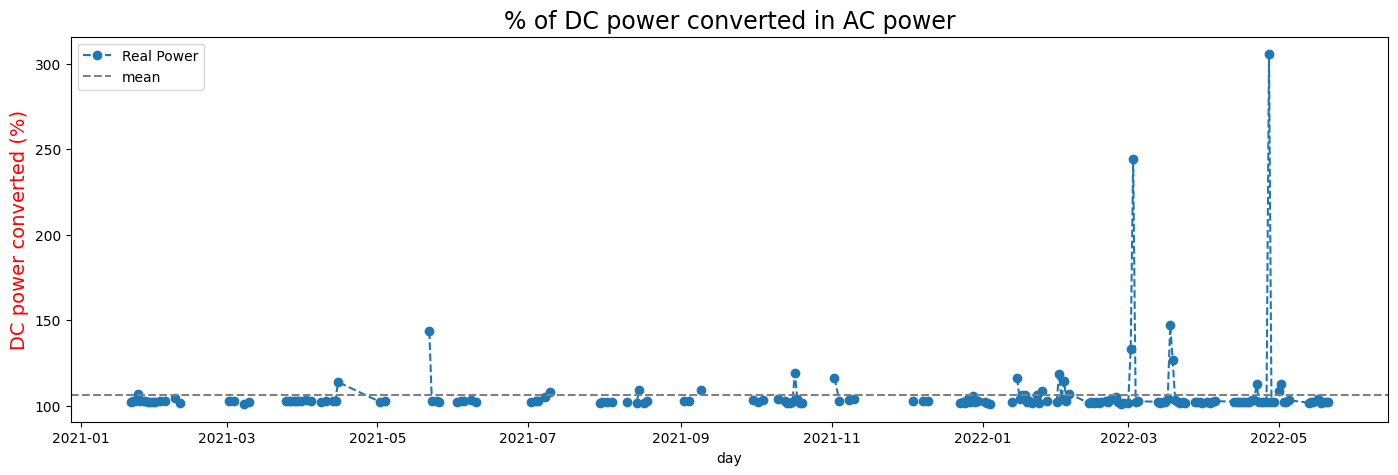

In [20]:
losses=df_solar.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

#Highest average DC_POWER is generated on "2021-04-01"

---





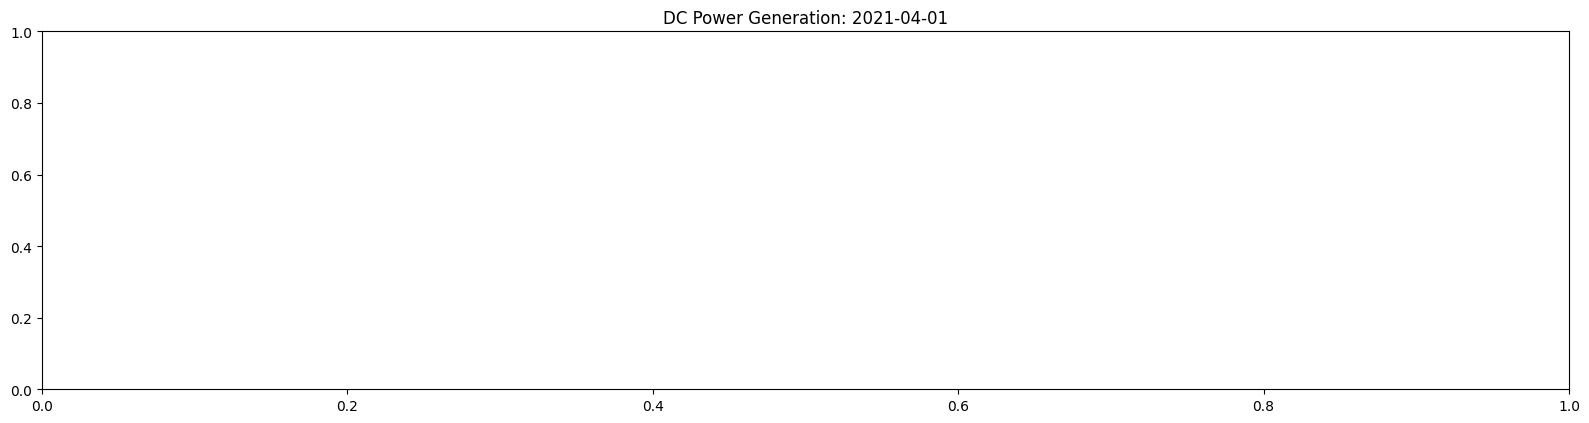

In [21]:
plt.figure(figsize=(16, 16))

date = ["2021-04-01"]

plt.subplot(411)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.tight_layout()
plt.show()


#Lowest average DC_POWER is generated on "2021-07-19"


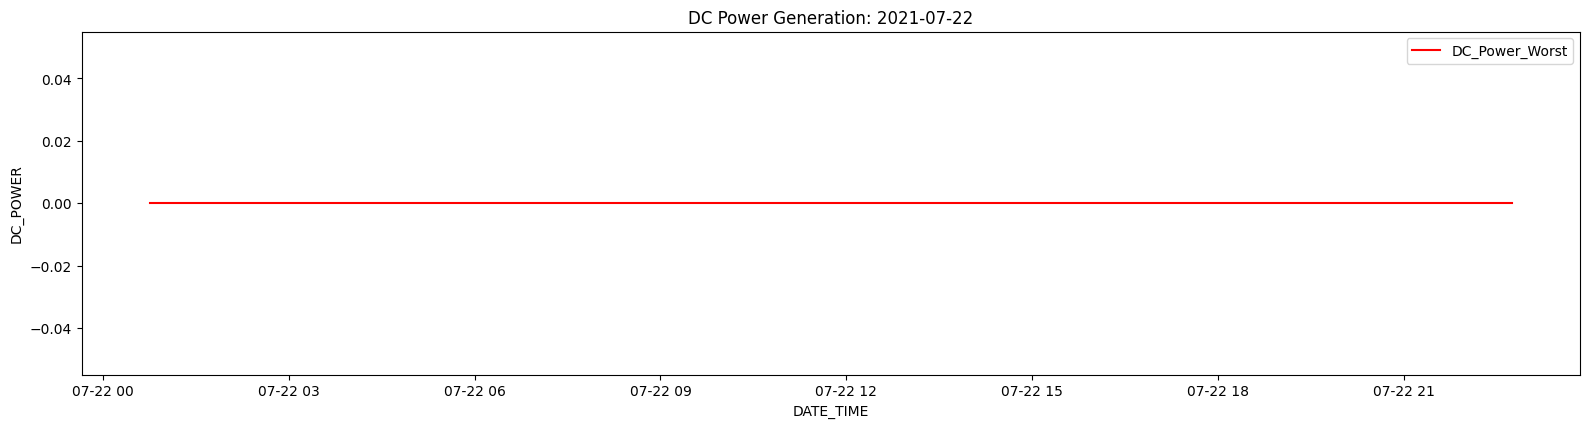

In [22]:
date = ["2021-07-22"]
plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="DC_POWER", label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.tight_layout()
plt.show()


#Solar Power Plant Inverter Efficiency Calculation


In [23]:
# solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
# solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [24]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  102.401 %


In [25]:
import numpy as np

# Filter for non-zero DC and AC power
non_zero_dc_mask = df_solar['DC_POWER'] > 0
non_zero_ac_mask = df_solar['AC_POWER'] > 0

# Calculate the integrated energy (in watt-hours) for DC and AC power
integrated_dc_energy = np.trapz(df_solar[non_zero_dc_mask]['DC_POWER'], dx=1) / 3600  # Convert to watt-hours
integrated_ac_energy = np.trapz(df_solar[non_zero_ac_mask]['AC_POWER'], dx=1) / 3600  # Convert to watt-hours

# Calculate the efficiency
solar_plant_efficiency = (integrated_ac_energy / integrated_dc_energy) * 100

print(f"Efficiency of the Solar Power Plant: {solar_plant_efficiency:0.3f} %")


Efficiency of the Solar Power Plant: 102.606 %


In [26]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

738

In [27]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

728

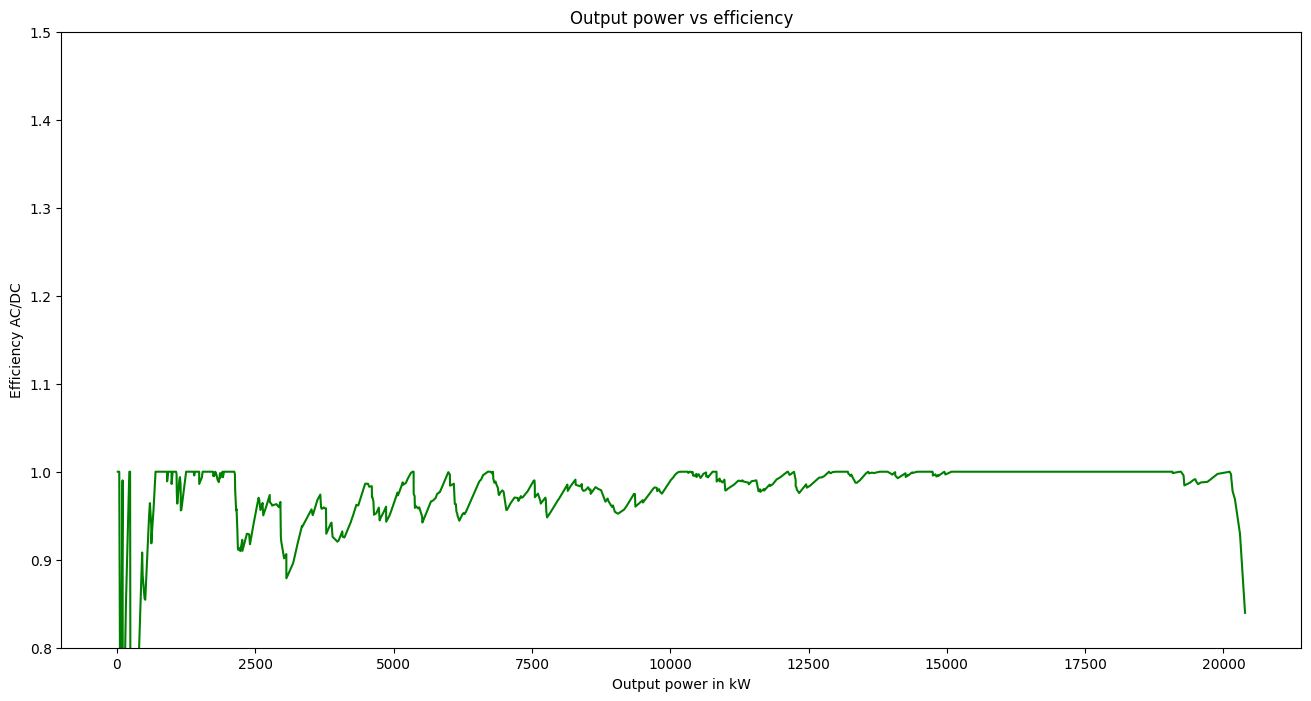

In [28]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 8))
# AC_list.sort()
# DC_list.sort()

# # Filter elements in AC_list to match the length of DC_list
# AC_list = [ac for ac, dc in zip(AC_list, DC_list)]

# eff = [i / j for i, j in zip(AC_list, DC_list)]

# plt.plot(AC_list, eff, color='green')
# plt.xlabel('Output power in kW')
# plt.ylabel('efficiency AC/DC')
# plt.title('Output power vs efficiency')
# plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
AC_list.sort()
DC_list.sort()

# Filter elements in AC_list to match the length of DC_list
AC_list = [ac for ac, dc in zip(AC_list, DC_list)]

eff = [min(i / j, 1.0) for i, j in zip(AC_list, DC_list)]  # Clip values to 1.0 (100%)

plt.plot(AC_list, eff, color='green')
plt.xlabel('Output power in kW')
plt.ylabel('Efficiency AC/DC')
plt.title('Output power vs efficiency')

# Set the y-axis limits to a maximum of 100%
plt.ylim(0.8, 1.5)

plt.show()


In [29]:
# import matplotlib.pyplot as plt

# # Assuming you have a time interval in hours (e.g., 1 hour)
# time_interval_hours = 1

# # Convert AC and DC power lists to energy (Wh)
# AC_energy = [ac * time_interval_hours for ac in AC_list]
# DC_energy = [dc * time_interval_hours for dc in DC_list]

# # Now, AC_energy and DC_energy contain the energy values in Wh.

# # You can print the first few elements to check the conversion.
# print("AC Energy (Wh):", AC_energy[:5])
# print("DC Energy (Wh):", DC_energy[:5])

# # You can proceed to plot the AC power vs. efficiency graph as you did before.
# plt.figure(figsize=(16, 8))

# # Sort AC and DC power lists (if not already sorted)
# AC_list.sort()
# DC_list.sort()

# # Calculate the efficiency for each point
# efficiency = [100 * (ac / dc) for ac, dc in zip(AC_energy, DC_energy)]
# # Plot the curve
# plt.plot(AC_energy, efficiency, color='green')
# plt.xlabel('AC Energy (Wh)')
# plt.ylabel('Efficiency (AC/DC)%')
# plt.title('Inverter Efficiency vs AC Energy')
# plt.grid(True)
# plt.show()


In [32]:

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_solar is your DataFrame
# weather_features = ['DC_POWER', 'temperature_2m (°C)','rain (mm)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'wind_speed_100m (km/h)', 'wind_direction_10m (°)']
weather_features = ['DC_POWER', 'temperature_2m (°C)']

# Add 'AC_POWER' to the list of features
all_features = weather_features + ['AC_POWER']

# Select the relevant columns from the DataFrame
selected_data = df_solar[all_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Extract the correlation of 'AC_POWER' with other features
ac_power_correlation = correlation_matrix['AC_POWER']

# Display the correlation values
print(ac_power_correlation)

# df2 = df_solar.copy()
# X = df2['DC_POWER','temperature_2m (°C)'].values  # Reshape X to be a 2D array
y = df_solar['AC_POWER']

X = df_solar[['DC_POWER','temperature_2m (°C)']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


DC_POWER               0.999970
temperature_2m (°C)    0.387329
AC_POWER               1.000000
Name: AC_POWER, dtype: float64


In [33]:
!pip install scikit-learn
!pip install xgboost


In [34]:
from sklearn.svm import SVR


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  99.99 %


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import numpy as np

# Assuming you have X_train, X_test, y_train, and y_test defined

# Create and fit the RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Make predictions with the Random Forest Regressor
y_pred_rfr = rfr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

# Calculate Mean Absolute Error (MAE)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Calculate the range of the target variable
target_range = np.ptp(y_test)

# Calculate MSE Percentage
mse_percentage = (mse_rfr / target_range) * 100

# Calculate MAE Percentage
mae_percentage = (mae_rfr / target_range) * 100

# Calculate Explained Variance Score
explained_variance_rfr = explained_variance_score(y_test, y_pred_rfr)

# Calculate R-squared (R2) Score
r2_score_rfr = r2_score(y_test, y_pred_rfr)

print("Mean Squared Error (MSE):", mse_rfr)
print("Mean Absolute Error (MAE):", mae_rfr)
print("MSE Percentage:", mse_percentage)
print("MAE Percentage:", mae_percentage)
print("Explained Variance Score:", explained_variance_rfr)
print("R-squared (R2) Score:", r2_score_rfr)


Mean Squared Error (MSE): 1757.8694108595466
Mean Absolute Error (MAE): 18.476984193305924
MSE Percentage: 8.530447958749681
MAE Percentage: 0.08966362980203778
Explained Variance Score: 0.9999537487869382
R-squared (R2) Score: 0.999953734239965


In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  99.99 %


In [38]:
!pip install tensorflow


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [40]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  # Input layer with 1 feature
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
X_train = X_train.reshape((-1, 2))  # Assuming the second dimension is 2
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
# mse = mean_squared_error(y_test, y_pred)

# Calculate the range of the target variable
target_range = np.max(y_test) - np.min(y_test)

# Normalize the MSE by dividing by the target range and multiplying by 100 to get a percentage
normalized_mse = (mse / target_range) * 100

print(f'Normalized Mean Squared Error (%): {normalized_mse:.4f}')

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
score_lr = 100 * lr_clf.score(X_test, y_test)
print(f'LR Model score = {score_lr:4.4f}%')

degree = 2  # You can adjust the degree
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
score_polyreg = 100 * polyreg.score(X_test, y_test)
print(f'Polynomial Regression score = {score_polyreg:4.4f}%')

rf_clf = RandomForestRegressor(n_estimators=100, random_state=21)
rf_clf.fit(X_train, y_train)
score_rf = 100 * rf_clf.score(X_test, y_test)
print(f'Random Forest Regression score = {score_rf:4.4f}%')

# svr = SVR(kernel='linear')  # You can also try 'rbf' or 'poly' kernels
# svr.fit(X_train, y_train)
# score_svr = 100 * svr.score(X_test, y_test)
# print(f'SVR score = {score_svr:4.4f}%')

xgb_clf = XGBRegressor(n_estimators=100, random_state=21)
xgb_clf.fit(X_train, y_train)
score_xgb = 100 * xgb_clf.score(X_test, y_test)
print(f'XG Boost Model score = {score_xgb:4.4f}%')

prediction = rf_clf.predict(X_test)
print(prediction)

LR Model score = 99.9945%
Polynomial Regression score = 99.9947%
Random Forest Regression score = 99.9954%
XG Boost Model score = 99.9912%
[0.00000000e+00 1.67831900e+04 2.30453000e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.80337000e+03 0.00000000e+00 0.00000000e+00 1.00474100e+04
 9.33002000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.32616900e+04 0.00000000e+00 0.00000000e+00
 3.18617000e+03 1.31597000e+04 9.02000000e+00 1.54061600e+04
 0.00000000e+00 1.40435600e+04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.07346000e+03 0.00000000e+00
 0.00000000e+00 1.32453300e+04 2.99811111e+00 9.41131000e+03
 9.09646000e+03 0.00000000e+00 4.28653000e+03 1.21218300e+04
 8.41296000e+03 1.93403800e+04 0.00000000e+00 1.00754600e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.06230000e+02 0.00000000e+00 0.00000000e+00
 0.0000

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Linear Regression
mse_lr = mean_squared_error(y_test, lr_clf.predict(X_test))
mae_lr = mean_absolute_error(y_test, lr_clf.predict(X_test))
rmse_lr = np.sqrt(mse_lr)
evs_lr = explained_variance_score(y_test, lr_clf.predict(X_test))

print(f'Linear Regression - MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, Explained Variance: {evs_lr:.4f}')

# Polynomial Regression
mse_polyreg = mean_squared_error(y_test, polyreg.predict(X_test))
mae_polyreg = mean_absolute_error(y_test, polyreg.predict(X_test))
rmse_polyreg = np.sqrt(mse_polyreg)
evs_polyreg = explained_variance_score(y_test, polyreg.predict(X_test))

print(f'Polynomial Regression - MSE: {mse_polyreg:.4f}, MAE: {mae_polyreg:.4f}, RMSE: {rmse_polyreg:.4f}, Explained Variance: {evs_polyreg:.4f}')

# Random Forest Regression
mse_rf = mean_squared_error(y_test, rf_clf.predict(X_test))
mae_rf = mean_absolute_error(y_test, rf_clf.predict(X_test))
rmse_rf = np.sqrt(mse_rf)
evs_rf = explained_variance_score(y_test, rf_clf.predict(X_test))

print(f'Random Forest Regression - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, Explained Variance: {evs_rf:.4f}')

# XG Boost Model
mse_xgb = mean_squared_error(y_test, xgb_clf.predict(X_test))
mae_xgb = mean_absolute_error(y_test, xgb_clf.predict(X_test))
rmse_xgb = np.sqrt(mse_xgb)
evs_xgb = explained_variance_score(y_test, xgb_clf.predict(X_test))

print(f'XG Boost Model - MSE: {mse_xgb:.4f}, MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}, Explained Variance: {evs_xgb:.4f}')


from sklearn.metrics import r2_score

# Linear Regression
r2_lr = r2_score(y_test, lr_clf.predict(X_test))

# Polynomial Regression
r2_polyreg = r2_score(y_test, polyreg.predict(X_test))

# Random Forest Regression
r2_rf = r2_score(y_test, rf_clf.predict(X_test))

# XG Boost Model
r2_xgb = r2_score(y_test, xgb_clf.predict(X_test))

print(f'Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, Explained Variance: {evs_lr:.4f}')
print(f'Polynomial Regression - R2: {r2_polyreg:.4f}, MSE: {mse_polyreg:.4f}, MAE: {mae_polyreg:.4f}, RMSE: {rmse_polyreg:.4f}, Explained Variance: {evs_polyreg:.4f}')
print(f'Random Forest Regression - R2: {r2_rf:.4f}, MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, Explained Variance: {evs_rf:.4f}')
print(f'XG Boost Model - R2: {r2_xgb:.4f}, MSE: {mse_xgb:.4f}, MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}, Explained Variance: {evs_xgb:.4f}')



Linear Regression - MSE: 2104.6315, MAE: 33.4305, RMSE: 45.8763, Explained Variance: 0.9999
Polynomial Regression - MSE: 2024.4260, MAE: 32.1146, RMSE: 44.9936, Explained Variance: 0.9999
Random Forest Regression - MSE: 1743.4581, MAE: 18.4778, RMSE: 41.7547, Explained Variance: 1.0000
XG Boost Model - MSE: 3328.7892, MAE: 26.8336, RMSE: 57.6957, Explained Variance: 0.9999
Linear Regression - R2: 0.9999, MSE: 2104.6315, MAE: 33.4305, RMSE: 45.8763, Explained Variance: 0.9999
Polynomial Regression - R2: 0.9999, MSE: 2024.4260, MAE: 32.1146, RMSE: 44.9936, Explained Variance: 0.9999
Random Forest Regression - R2: 1.0000, MSE: 1743.4581, MAE: 18.4778, RMSE: 41.7547, Explained Variance: 1.0000
XG Boost Model - R2: 0.9999, MSE: 3328.7892, MAE: 26.8336, RMSE: 57.6957, Explained Variance: 0.9999


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head(20)

In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

In [ ]:
!pip install visualkeras

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from visualkeras import layered_view

X = df2['DC_POWER'].values.reshape(-1, 1)  # Reshape X to be a 2D array
y = df2['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Define a deep ANN model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=1))

# Add hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())  # BatchNormalization layer
model.add(Dropout(0.2))  # Dropout layer

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())  # BatchNormalization layer
model.add(Dropout(0.2))  # Dropout layer

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())  # BatchNormalization layer
model.add(Dropout(0.2))  # Dropout layer

model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Visualize the model
visualkeras = layered_view(model, legend=True)
visualkeras.save('model1.png')  # Save the visualization as an image

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ffann_lr = np.sqrt(mse)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'RMSE')


In [ ]:
from tabulate import tabulate

# Define your data without the RMSE column
data = [
    ["Linear Regression", 0.9999, 2983.1835, 36.4734],
    ["Polynomial Regression", 0.9999, 2932.4583, 34.8845],
    ["Random Forest Regression", 0.9999, 2136.3362, 17.4139],
    ["XG Boost Model", 0.9999, 2281.7863, 18.2309],
    ["Deep ANN", 0.9999, 3485.4279, 26.2530],
    ["FF-ANN", 0.9632, 1377205.4490, 603.3102]
]

# Define the headers without the RMSE column
headers = ["Model", "R2", "MSE", "MAE"]

# Create and print the table
table = tabulate(data, headers, tablefmt="grid")
print(table)
